# Financial Fraud Detection - Exploratory Data Analysis Report

This report performs comprehensive exploratory data analysis (EDA) on the cleaned dataset `13-preprocessed_final.csv`.

## Analysis Objectives

1. **Data Quality Assessment**: Check data completeness and consistency
2. **Distribution Analysis**: Understand the distribution characteristics of variables
3. **Correlation Analysis**: Identify relationships between features
4. **Group Comparison**: Compare features between violation/normal and ST/non-ST companies
5. **Time Trend Analysis**: Analyze trends of indicators over time
6. **Industry Analysis**: Analyze financial characteristics and fraud risk across industries

---


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os

# Configure matplotlib and seaborn
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.size'] = 10

sns.set_style("whitegrid")
sns.set_palette("husl")

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

print("\n" + "=" * 80)
print("Financial Fraud Detection - Exploratory Data Analysis (EDA)")
print("=" * 80)
print(f"Start time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 80)



Financial Fraud Detection - Exploratory Data Analysis (EDA)
Start time: 2025-11-10 00:25:18


## 1. Data Loading and Basic Information


In [7]:
# Get data file path
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Try multiple possible paths
possible_paths = [
    '13-preprocessed_final.csv',
    os.path.join(current_dir, '13-preprocessed_final.csv'),
    os.path.join(current_dir, 'Insight_output', '13-preprocessed_final.csv'),
]

if 'Insight_output' in current_dir:
    insight_dir = current_dir if current_dir.endswith('Insight_output') else os.path.join(current_dir, 'Insight_output')
    possible_paths.insert(0, os.path.join(insight_dir, '13-preprocessed_final.csv'))
else:
    parent_dir = os.path.dirname(current_dir)
    insight_dir = os.path.join(parent_dir, 'Insight_output')
    possible_paths.append(os.path.join(insight_dir, '13-preprocessed_final.csv'))

# Find existing file
data_file = None
for path in possible_paths:
    if os.path.exists(path):
        data_file = path
        break

if data_file is None:
    error_msg = f"Data file not found! Tried paths:\n"
    for path in possible_paths:
        error_msg += f"  - {os.path.abspath(path)}\n"
    error_msg += "\nPlease ensure '13-preprocessed_final.csv' exists in Insight_output directory"
    raise FileNotFoundError(error_msg)

# Load data
print("Loading data...")
print(f"Using data file: {os.path.abspath(data_file)}")
df = pd.read_csv(data_file, encoding='utf-8-sig')
print(f"✓ Data loaded successfully: {df.shape[0]} rows × {df.shape[1]} columns")

# Basic information
print("\n" + "=" * 80)
print("Basic Data Information")
print("=" * 80)
print(f"Data shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumn list ({len(df.columns)} columns):")
print(df.columns.tolist())

# Display first few rows
print("\n" + "=" * 80)
print("Data Preview (First 5 rows)")
print("=" * 80)
display(df.head())


Current working directory: C:\Users\jimmy\Desktop\EI\大数据智能分析与理论\Insight_output
Loading data...
Using data file: C:\Users\jimmy\Desktop\EI\大数据智能分析与理论\Insight_output\13-preprocessed_final.csv
✓ Data loaded successfully: 108345 rows × 40 columns

Basic Data Information
Data shape: (108345, 40)
Memory usage: 43.60 MB

Column list (40 columns):
['Stkcd', 'Accper', 'Typrep', 'Indcd', 'isviolation', 'isST', 'F010201A', 'F010702B', 'F010801B', 'F011201A', 'F040203B', 'F040205C', 'F040401B', 'F040505C', 'F040803B', 'F040805C', 'F041203B', 'F041205C', 'F041301B', 'F041403B', 'F041405C', 'F041703B', 'F041705C', 'F041803B', 'F041805C', 'F050104C', 'F053201B', 'F053301C', 'F052401B', 'F053202B', 'F080102A', 'F081002B', 'F082601B', 'F080603A', 'F070201B', 'F070301B', 'F090102B', 'F020108', 'F110301B', 'F110801B']

Data Preview (First 5 rows)


,Stkcd,Accper,Typrep,Indcd,isviolation,isST,F010201A,F010702B,F010801B,F011201A,F040203B,F040205C,F040401B,F040505C,F040803B,F040805C,F041203B,F041205C,F041301B,F041403B,F041405C,F041703B,F041705C,F041803B,F041805C,F050104C,F053201B,F053301C,F052401B,F053202B,F080102A,F081002B,F082601B,F080603A,F070201B,F070301B,F090102B,F020108,F110301B,F110801B
0,1,2010,A,I65,0,0,6.3994,35.2962,-0.2034,0.2358,0.1081,0.5535,0.0000,2.7788,0.8775,4.1239,0.0476,0.2734,0.4850,2.1779,8.2253,0.0066,0.0258,0.1858,0.7517,0.0117,0.0938,0.4480,3.5569,0.0008,1.2951,0.4064,0.0769,0.1879,1.2086,1.7276,0.5082,0.5100,0.0000,1.0000
1,1,2010,A,I65,0,0,777.4277,5.1650,-33.8419,0.2662,0.2266,0.5752,0.0000,4.9054,3.6361,2.9572,0.1151,0.4342,0.2592,4.2785,8.2346,0.0136,0.0268,0.3235,0.6455,0.0122,0.1522,0.5271,0.4803,0.0022,1.6912,0.3123,0.1107,0.1537,1.0126,1.0242,0.8703,0.9800,0.0000,1.0000
2,1,2010,A,I65,0,0,1.5605,17.1803,-0.0764,0.5306,0.3900,0.6816,0.0000,19.4567,1.6316,2.3110,0.3322,0.5789,0.1890,6.1750,7.9062,0.0201,0.0270,0.4833,0.6470,0.0125,0.2286,0.4476,0.4855,0.0036,1.6840,0.3015,0.1727,0.2179,1.0533,1.0698,1.3584,1.4600,0.0000,1.0000
3,1,2010,A,I65,0,0,2.6009,25.4990,-0.0814,0.4117,0.5208,0.5208,0.0000,37.7341,2.5444,3.2503,0.4346,0.4346,0.1362,8.5527,8.5527,0.0267,0.0267,0.6545,0.6545,0.0122,0.2981,0.5923,0.3968,0.0024,1.6218,0.2491,0.2335,0.2371,1.0476,1.0790,1.8031,1.9100,0.0000,1.0000
4,1,2011,A,I65,0,0,10.2981,8.2255,-0.4732,0.2389,0.1624,0.5130,0.0000,29.8791,0.5570,3.7208,0.0616,0.4274,0.4262,2.3473,8.9135,0.0073,0.0269,0.1625,0.6622,0.0127,0.0888,0.2806,0.2450,0.0012,1.6260,0.5222,0.0716,0.3027,1.0000,0.7747,0.6893,0.6900,0.0000,1.0000


## 2. Data Quality Assessment


In [8]:
# Separate ID columns, labels, and features
id_cols = ['Stkcd', 'Accper', 'Typrep', 'Indcd']
label_cols = ['isviolation', 'isST']
feature_cols = [col for col in df.columns if col.startswith('F')]

print("=" * 80)
print("Data Structure Analysis")
print("=" * 80)
print(f"ID columns ({len(id_cols)}): {id_cols}")
print(f"Label columns ({len(label_cols)}): {label_cols}")
print(f"Feature columns ({len(feature_cols)}): {feature_cols[:10]}... (total {len(feature_cols)})")

# Check missing values
print("\n" + "=" * 80)
print("Missing Value Check")
print("=" * 80)
missing_stats = df.isnull().sum()
missing_pct = (missing_stats / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_stats,
    'Missing Rate (%)': missing_pct
}).sort_values('Missing Count', ascending=False)

if missing_stats.sum() == 0:
    print("✓ No missing values! Data has been fully cleaned.")
else:
    print("Columns with missing values:")
    display(missing_df[missing_df['Missing Count'] > 0])

# Check data types
print("\n" + "=" * 80)
print("Data Type Statistics")
print("=" * 80)
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)
print("\nData types for each column:")
dtype_df = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-null Count': df.count(),
    'Unique Count': [df[col].nunique() for col in df.columns]
})
display(dtype_df)


Data Structure Analysis
ID columns (4): ['Stkcd', 'Accper', 'Typrep', 'Indcd']
Label columns (2): ['isviolation', 'isST']
Feature columns (34): ['F010201A', 'F010702B', 'F010801B', 'F011201A', 'F040203B', 'F040205C', 'F040401B', 'F040505C', 'F040803B', 'F040805C']... (total 34)

Missing Value Check
✓ No missing values! Data has been fully cleaned.

Data Type Statistics
float64    34
int64       4
object      2
Name: count, dtype: int64

Data types for each column:


,Column,Data Type,Non-null Count,Unique Count
Stkcd,Stkcd,int64,108345,3739
Accper,Accper,int64,108345,10
Typrep,Typrep,object,108345,2
Indcd,Indcd,object,108345,76
isviolation,isviolation,int64,108345,2
isST,isST,int64,108345,2
F010201A,F010201A,float64,108345,106205
F010702B,F010702B,float64,108345,106209
F010801B,F010801B,float64,108345,99946
F011201A,F011201A,float64,108345,101522


Label Distribution Analysis

1. Violation Label (isviolation) Distribution:


,Count,Percentage (%)
isviolation,,
0,102511,94.6200
1,5834,5.3800


Violation sample proportion: 5.38%

2. ST Label (isST) Distribution:


,Count,Percentage (%)
isST,,
0,85779,79.1700
1,22566,20.8300


ST sample proportion: 20.83%

3. Label Cross Analysis:
Count Cross Table:


isST,0,1,All
isviolation,,,
0,84948,17563,102511
1,831,5003,5834
All,85779,22566,108345



Percentage Cross Table (%):


isST,0,1
isviolation,,
0,78.4100,16.2100
1,0.7700,4.6200


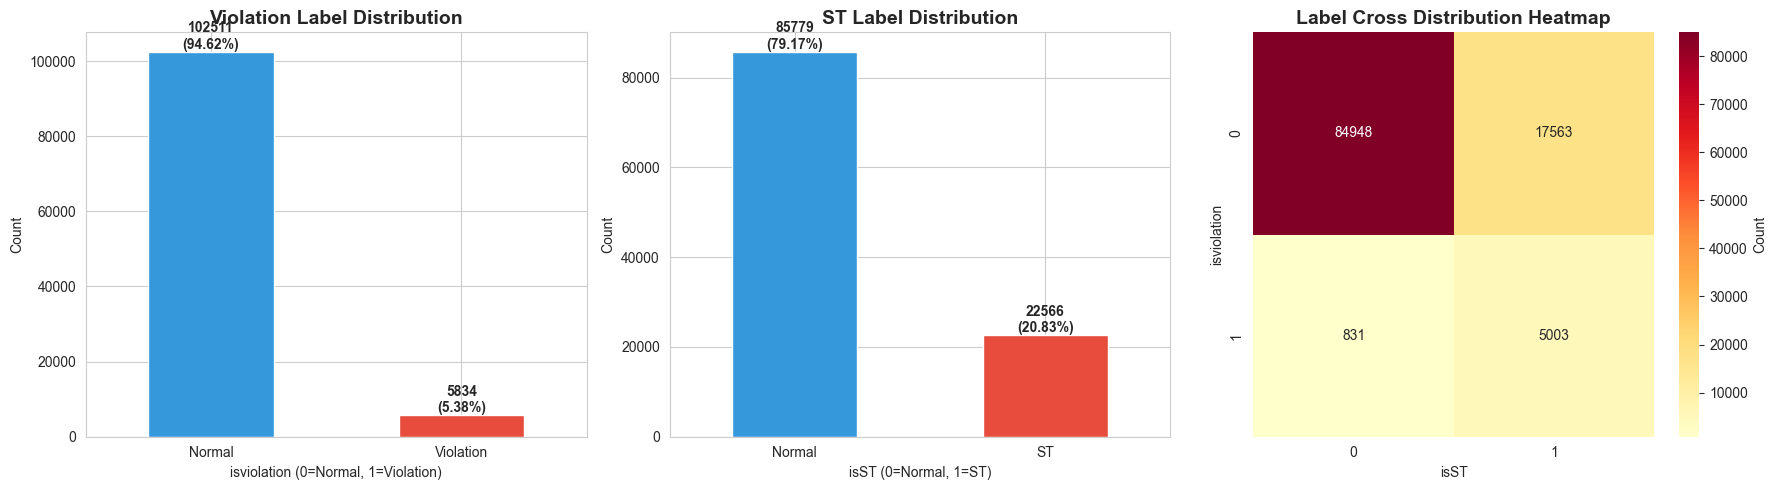


✓ Chart saved: label_distribution.png


In [9]:
# Label distribution analysis
print("=" * 80)
print("Label Distribution Analysis")
print("=" * 80)

# isviolation distribution
print("\n1. Violation Label (isviolation) Distribution:")
violation_counts = df['isviolation'].value_counts().sort_index()
violation_pct = df['isviolation'].value_counts(normalize=True).sort_index() * 100
violation_dist = pd.DataFrame({
    'Count': violation_counts,
    'Percentage (%)': violation_pct.round(2)
})
display(violation_dist)
print(f"Violation sample proportion: {df['isviolation'].mean():.2%}")

# isST distribution
print("\n2. ST Label (isST) Distribution:")
st_counts = df['isST'].value_counts().sort_index()
st_pct = df['isST'].value_counts(normalize=True).sort_index() * 100
st_dist = pd.DataFrame({
    'Count': st_counts,
    'Percentage (%)': st_pct.round(2)
})
display(st_dist)
print(f"ST sample proportion: {df['isST'].mean():.2%}")

# Label cross analysis
print("\n3. Label Cross Analysis:")
label_cross = pd.crosstab(df['isviolation'], df['isST'], margins=True)
label_cross_pct = pd.crosstab(df['isviolation'], df['isST'], normalize='all') * 100
print("Count Cross Table:")
display(label_cross)
print("\nPercentage Cross Table (%):")
display(label_cross_pct.round(2))

# Visualize label distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Violation label distribution
violation_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Violation Label Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('isviolation (0=Normal, 1=Violation)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Normal', 'Violation'], rotation=0)
for i, v in enumerate(violation_counts):
    axes[0].text(i, v, f'{v}\n({violation_pct.iloc[i]:.2f}%)', 
                ha='center', va='bottom', fontweight='bold')

# ST label distribution
st_counts.plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'])
axes[1].set_title('ST Label Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('isST (0=Normal, 1=ST)')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Normal', 'ST'], rotation=0)
for i, v in enumerate(st_counts):
    axes[1].text(i, v, f'{v}\n({st_pct.iloc[i]:.2f}%)', 
                ha='center', va='bottom', fontweight='bold')

# Label cross heatmap
sns.heatmap(label_cross.iloc[:-1, :-1], annot=True, fmt='d', cmap='YlOrRd', 
            ax=axes[2], cbar_kws={'label': 'Count'})
axes[2].set_title('Label Cross Distribution Heatmap', fontsize=14, fontweight='bold')
axes[2].set_xlabel('isST')
axes[2].set_ylabel('isviolation')

plt.tight_layout()
plt.savefig('label_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Chart saved: label_distribution.png")


## 3. Feature Distribution Analysis


In [ ]:
# Feature distribution analysis with pairplot
print("=" * 80)
print("Feature Distribution Analysis")
print("=" * 80)

# Select top 6 features for pairplot (to avoid too large plot and reduce computation time)
top_features = feature_cols[:6]
print(f"\nCreating pairplot for top {len(top_features)} features...")
print(f"Features: {top_features}")

# Sample data for faster pairplot generation (stratified sampling to maintain label distribution)
# Use 5000 samples for faster computation while maintaining representativeness
sample_size = min(5000, len(df))
print(f"\nSampling {sample_size} rows for pairplot (original: {len(df)} rows)...")

# Stratified sampling to maintain label distribution
from sklearn.model_selection import train_test_split
df_sample, _ = train_test_split(
    df[top_features + ['isviolation']], 
    test_size=1 - sample_size/len(df),
    stratify=df['isviolation'],
    random_state=42
)

print(f"Sampled data shape: {df_sample.shape}")
print(f"Label distribution in sample:")
print(df_sample['isviolation'].value_counts().sort_index())

# Create pairplot for numeric features colored by violation label
print("\nGenerating pairplot (this may take a moment)...")
plt.figure(figsize=(18, 14))
pair_plot = sns.pairplot(df_sample, 
                         vars=top_features,
                         hue='isviolation',
                         diag_kind='hist',
                         palette='viridis',
                         plot_kws={'alpha': 0.5, 's': 10},
                         diag_kws={'kde': True, 'bins': 25, 'alpha': 0.6})

pair_plot.fig.suptitle('Numeric Feature Relationship Matrix (Colored by Violation Label)\n(Sampled Data for Performance)', 
                        y=1.02, fontsize=18, fontweight='bold')
pair_plot.add_legend(title='Violation', labels=['Normal', 'Violation'])

plt.tight_layout()
plt.savefig('feature_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Pairplot saved: feature_pairplot.png")


Feature Distribution Analysis

Creating pairplot for top 8 features...
Features: ['F010201A', 'F010702B', 'F010801B', 'F011201A', 'F040203B', 'F040205C', 'F040401B', 'F040505C']


## 4. Correlation Analysis


Correlation Analysis


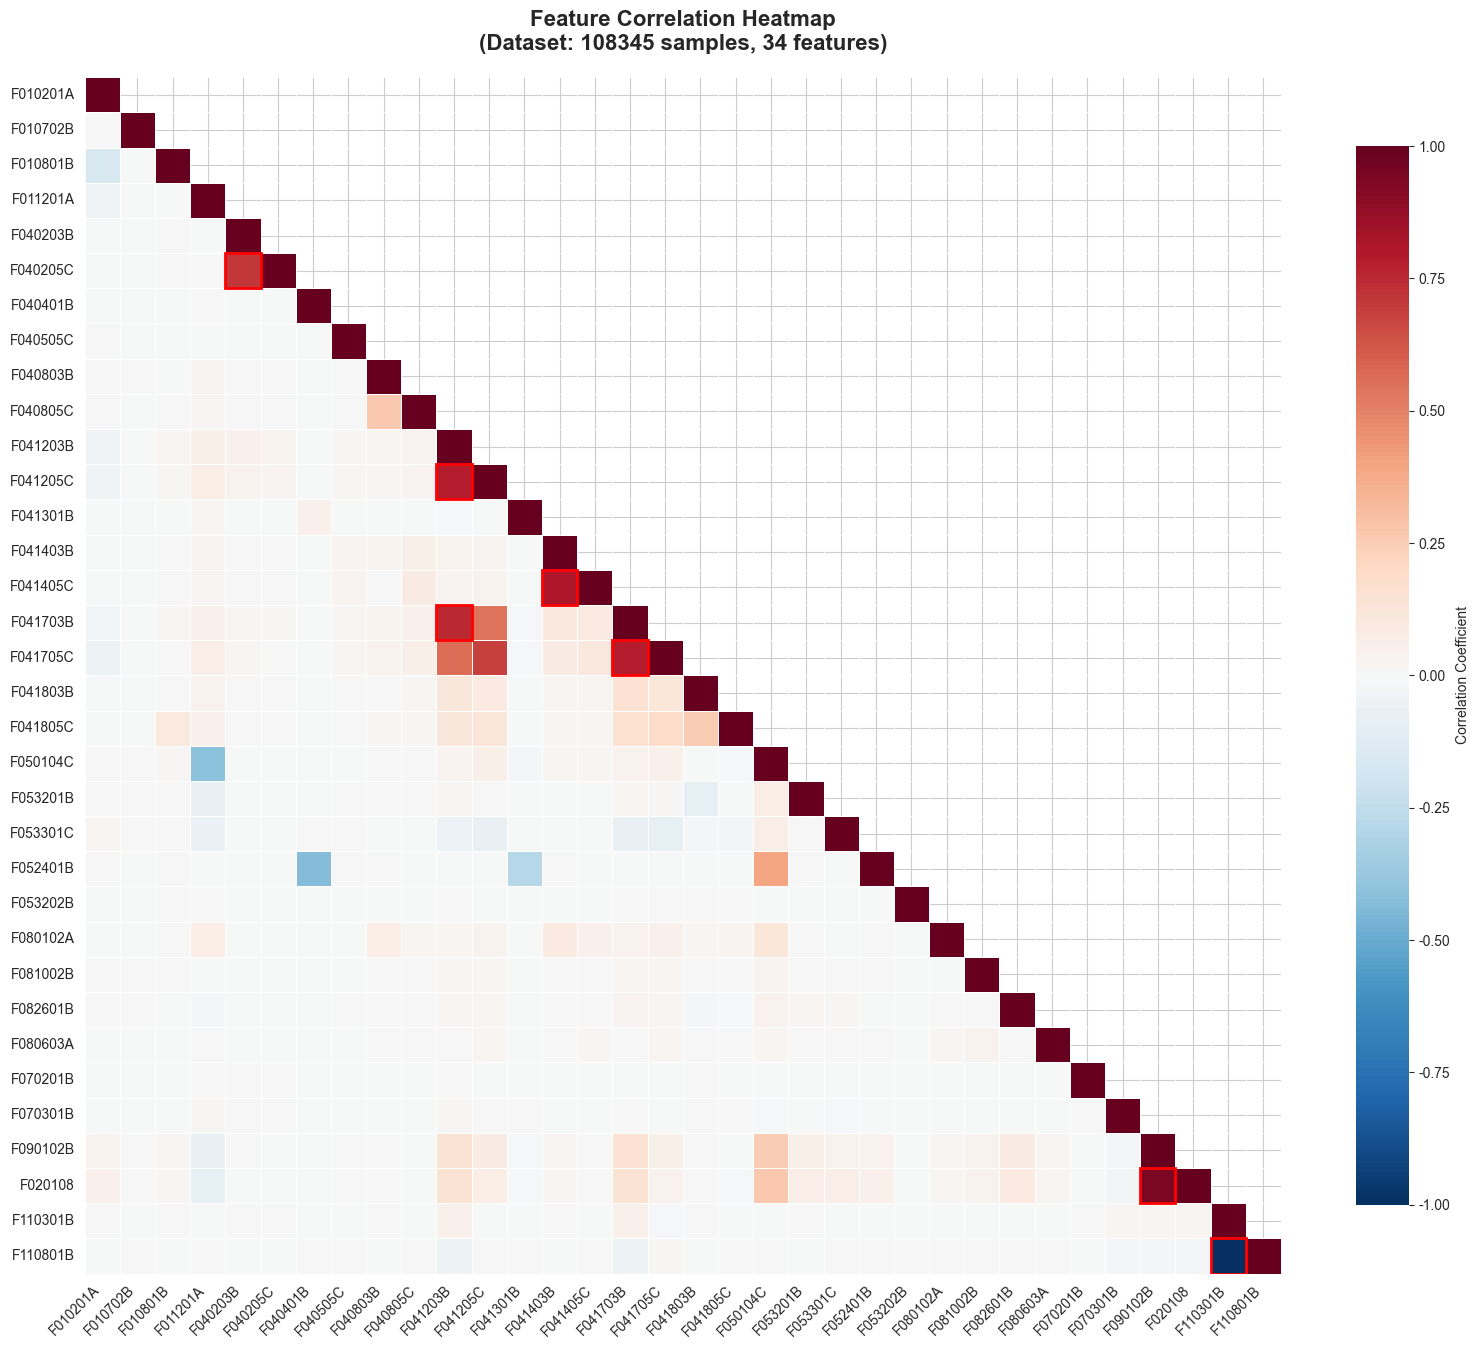


✓ Correlation heatmap saved: correlation_heatmap.png

Highly Correlated Feature Pairs (|r| > 0.7):


,Feature 1,Feature 2,Correlation
6,F110301B,F110801B,-1.0000
5,F090102B,F020108,0.9442
3,F041403B,F041405C,0.8080
4,F041703B,F041705C,0.7888
1,F041203B,F041205C,0.7881
2,F041203B,F041703B,0.7539
0,F040203B,F040205C,0.7100


In [10]:
# Correlation analysis
print("=" * 80)
print("Correlation Analysis")
print("=" * 80)

# Calculate correlation matrix for numeric features
corr = df[feature_cols].corr()

# Create enhanced correlation heatmap
plt.figure(figsize=(16, 14))

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Create heatmap
heatmap = sns.heatmap(corr, 
                      mask=mask,
                      annot=False,  # Set to True if you want correlation values
                      fmt=".2f",
                      cmap='RdBu_r',
                      center=0,
                      square=True,
                      cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
                      linewidths=0.5,
                      linecolor='white',
                      vmin=-1, vmax=1)

plt.title(f'Feature Correlation Heatmap\n(Dataset: {len(df)} samples, {len(corr.columns)} features)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Highlight high correlations (|r| > 0.7)
ax = plt.gca()
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i != j and not mask[i, j]:
            corr_val = corr.iloc[i, j]
            if abs(corr_val) > 0.7:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, 
                                          edgecolor='red', lw=2))

plt.tight_layout()
plt.savefig('correlation_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()
print("\n✓ Correlation heatmap saved: correlation_heatmap.png")

# Find highly correlated feature pairs
print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        corr_val = corr.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append({
                'Feature 1': corr.columns[i],
                'Feature 2': corr.columns[j],
                'Correlation': corr_val
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    display(high_corr_df)
else:
    print("No highly correlated pairs found (|r| > 0.7)")


## 5. Feature-Label Correlation Analysis


Feature-Label Correlation Analysis

Top 15 Features Correlated with Violation Label:


,Correlation with Violation,Correlation with ST
F020108,-0.0661,-0.1277
F090102B,-0.0643,-0.1206
F050104C,-0.0491,-0.0981
F011201A,0.0382,0.1081
F041205C,-0.0217,-0.0209
F041705C,-0.0162,-0.0097
F041203B,-0.0160,-0.0147
F053301C,-0.0154,-0.0390
F041805C,0.0145,0.0267
F041703B,-0.0114,-0.0094


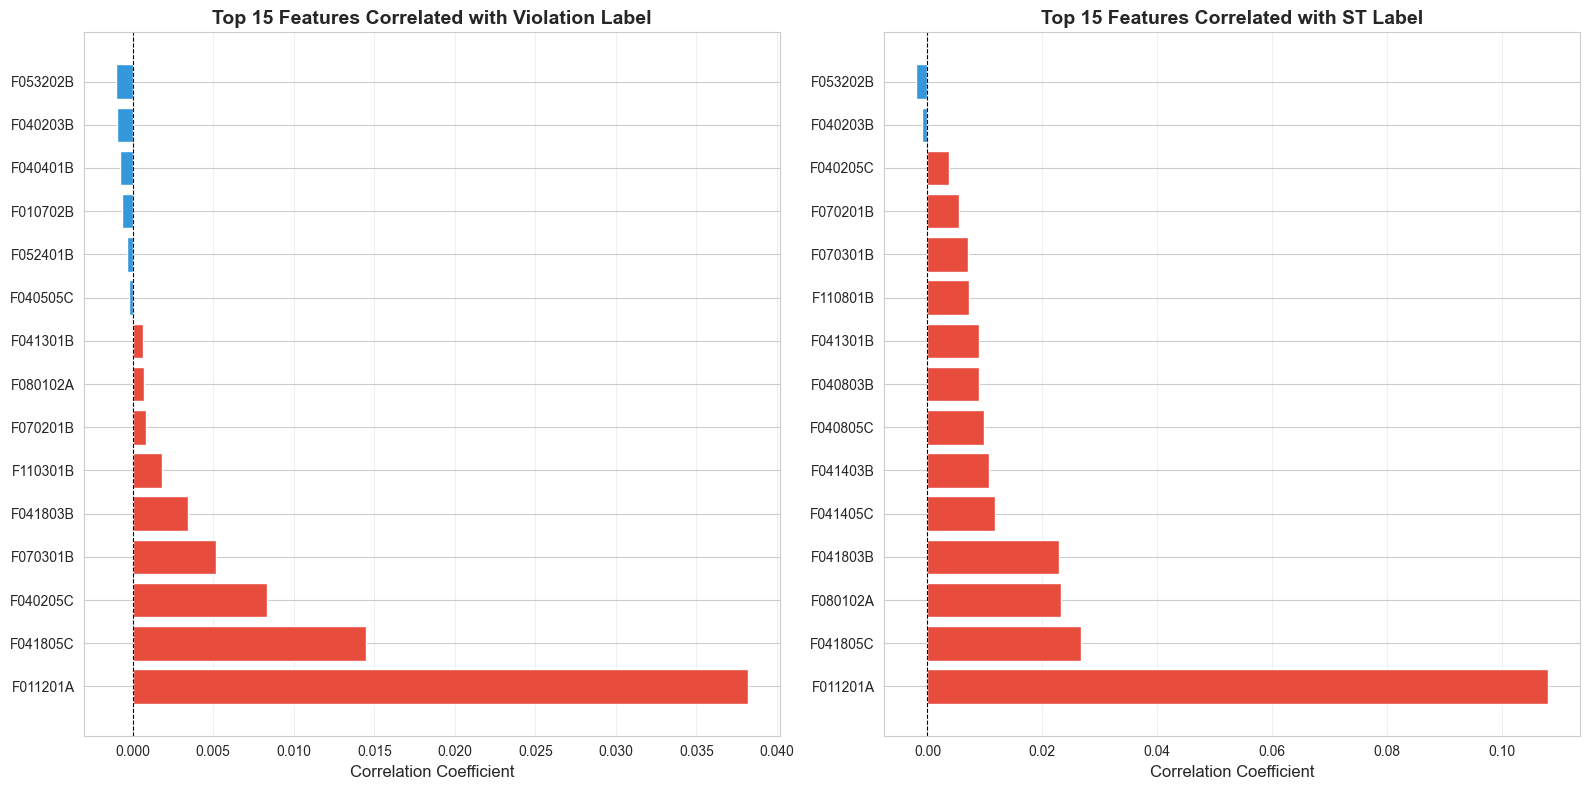


✓ Feature-label correlation chart saved: feature_label_correlation.png


In [11]:
# Feature-label correlation analysis
print("=" * 80)
print("Feature-Label Correlation Analysis")
print("=" * 80)

# Calculate correlation between features and labels
feature_violation_corr = df[feature_cols].apply(lambda x: x.corr(df['isviolation']))
feature_st_corr = df[feature_cols].apply(lambda x: x.corr(df['isST']))

# Create correlation dataframe
corr_with_labels = pd.DataFrame({
    'Correlation with Violation': feature_violation_corr,
    'Correlation with ST': feature_st_corr
}).sort_values('Correlation with Violation', key=abs, ascending=False)

print("\nTop 15 Features Correlated with Violation Label:")
display(corr_with_labels.head(15))

# Visualize feature-label correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Violation correlation
top_violation = corr_with_labels.nlargest(15, 'Correlation with Violation', keep='all')
axes[0].barh(range(len(top_violation)), top_violation['Correlation with Violation'], 
             color=['#e74c3c' if x > 0 else '#3498db' for x in top_violation['Correlation with Violation']])
axes[0].set_yticks(range(len(top_violation)))
axes[0].set_yticklabels(top_violation.index)
axes[0].set_xlabel('Correlation Coefficient', fontsize=12)
axes[0].set_title('Top 15 Features Correlated with Violation Label', fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[0].grid(True, alpha=0.3, axis='x')

# ST correlation
top_st = corr_with_labels.nlargest(15, 'Correlation with ST', keep='all')
axes[1].barh(range(len(top_st)), top_st['Correlation with ST'],
             color=['#e74c3c' if x > 0 else '#3498db' for x in top_st['Correlation with ST']])
axes[1].set_yticks(range(len(top_st)))
axes[1].set_yticklabels(top_st.index)
axes[1].set_xlabel('Correlation Coefficient', fontsize=12)
axes[1].set_title('Top 15 Features Correlated with ST Label', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('feature_label_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Feature-label correlation chart saved: feature_label_correlation.png")


## 6. Group Comparison Analysis


In [ ]:
# Group comparison analysis
print("=" * 80)
print("Group Comparison Analysis")
print("=" * 80)

# Select top features for comparison
top_features_for_comparison = corr_with_labels.head(10).index.tolist()

# Create box plots comparing violation vs normal
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_features_for_comparison):
    # Violation comparison
    violation_data = [df[df['isviolation'] == 0][feature].dropna(), 
                     df[df['isviolation'] == 1][feature].dropna()]
    
    bp = axes[idx].boxplot(violation_data, labels=['Normal', 'Violation'], 
                           patch_artist=True, widths=0.6)
    bp['boxes'][0].set_facecolor('#3498db')
    bp['boxes'][1].set_facecolor('#e74c3c')
    
    axes[idx].set_title(f'{feature} vs Violation', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Top 10 Features: Violation vs Normal Comparison', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('violation_comparison_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Violation comparison boxplot saved: violation_comparison_boxplot.png")

# Statistical test for top features
from scipy import stats

print("\nStatistical Significance Test (t-test) for Top Features:")
print("=" * 80)
stat_results = []
for feature in top_features_for_comparison[:10]:
    normal = df[df['isviolation'] == 0][feature].dropna()
    violation = df[df['isviolation'] == 1][feature].dropna()
    
    if len(normal) > 0 and len(violation) > 0:
        t_stat, p_value = stats.ttest_ind(normal, violation)
        stat_results.append({
            'Feature': feature,
            'Normal Mean': normal.mean(),
            'Violation Mean': violation.mean(),
            'Difference': violation.mean() - normal.mean(),
            't-statistic': t_stat,
            'p-value': p_value,
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })

stat_df = pd.DataFrame(stat_results)
display(stat_df)


Group Comparison Analysis
